In [1]:
%matplotlib inline
    
from skimage import io, segmentation
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
# implementation in helper
from slic import slic, get_k_centers
# 'custom' distance + feature + yx getter
from custom import generate_feature, get_yx, calculate_distance
# metrics
from metrics import RecallThickened, UnderSegmentation

In [2]:
# params 3-5
images = ['Images/Q3/castle.jpg', 'Images/Q3/castle2.jpg']
max_iter = 10

In [13]:
if __name__ == '__main__':
    # weights
    weights = [10, 150, 300]
    k = 16

    for weight in weights:
        print 'weight', weight
        for ima in images:
            image = io.imread(ima)
            nearest_centers, distance_start, distance_end = slic(image, \
                                                               k, \
                                                               max_iter, \
                                                               weight, \
                                                               generate_feature, \
                                                               calculate_distance, \
                                                               get_yx)

            marked = segmentation.mark_boundaries(image, nearest_centers, mode='outer')

            fn = 'Q3/' + ima.split('/')[-1]
            fn += '_' + str(weight)+ '.png'
            io.imsave(fn, marked)

centers 15
step size 102
centers 15
step size 77
centers 15
step size 102
centers 15
step size 77
centers 15
step size 102
centers 15
step size 77


/Users/jhh11/.virtualenvs/cv/lib/python2.7/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


centers 15
step size 102
centers 15
step size 77


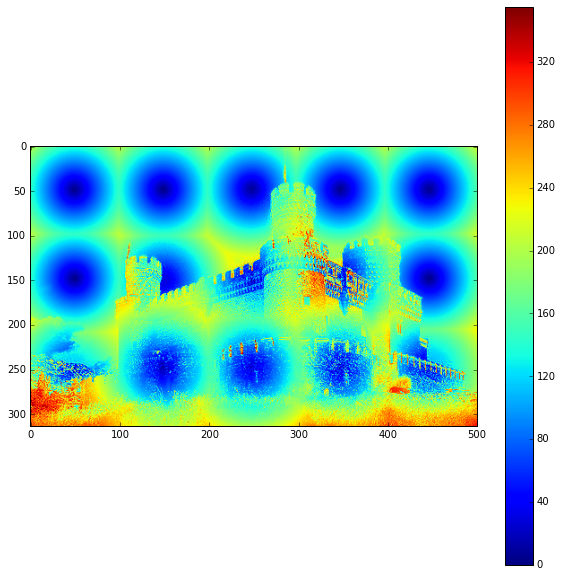

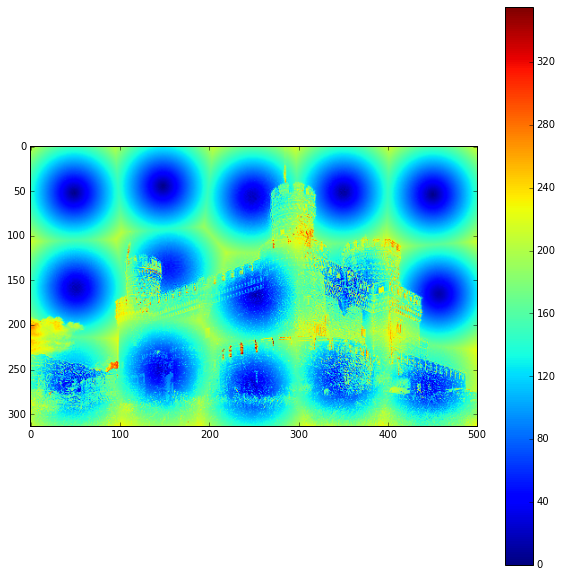

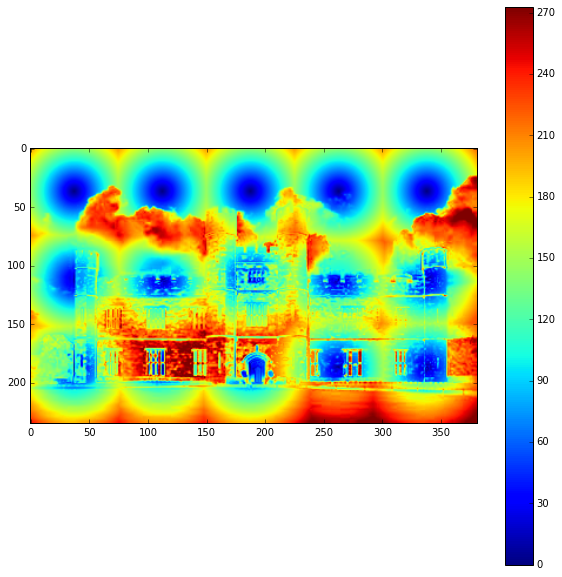

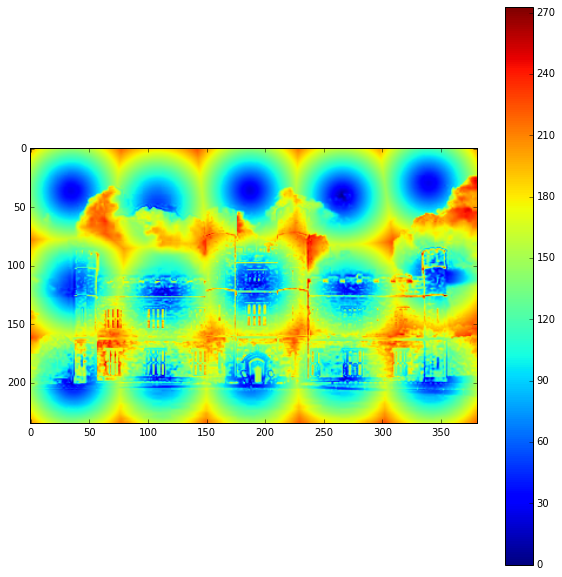

In [7]:
if __name__ == '__main__':
    # distances
    weight = 300
    k = 16

    for ima in images:
        image = io.imread(ima)
        nearest_centers, distance_start, distance_end = slic(image, \
                                                               k, \
                                                               max_iter, \
                                                               weight, \
                                                               generate_feature, \
                                                               calculate_distance, \
                                                               get_yx)

        fn = 'Q3/' + ima.split('/')[-1]
        fn1 = fn + '_distance_start.png'
        fn2 = fn + '_distance_end.png'

        min_dist = min(np.min(distance_start), np.min(distance_end))
        max_dist = min(np.max(distance_start), np.max(distance_end))

        fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))
        heatmap = ax.imshow(distance_start, vmin=min_dist, vmax=max_dist)
        fig.colorbar(heatmap)
        plt.savefig(fn1)

        fig2, ax2 = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))
        heatmap2 = ax2.imshow(distance_end, vmin=min_dist, vmax=max_dist)
        fig2.colorbar(heatmap2)
        plt.savefig(fn2)

In [14]:
def write_marked_slic(ima, kk, weight):
    image = io.imread(ima)
    nearest_centers, distance_start, distance_end = slic(image, \
                                                   kk, \
                                                   max_iter, \
                                                   weight, \
                                                   generate_feature, \
                                                   calculate_distance, \
                                                   get_yx)
    marked = segmentation.mark_boundaries(image, nearest_centers, mode='outer')
    fn = 'Q3/' + ima.split('/')[-1]
    fn += '_k' + str(kk)+ '.png'
    io.imsave(fn, marked)

In [15]:
if __name__ == '__main__':
    # ks
    weight = 300
    kks = [16, 64, 256, 1024]

    for kk in kks:
        print 'k', kk
        for ima in images:
            %timeit -n1 -r1 -p5 write_marked_slic(ima, kk, weight)

centers 15
step size 102
1 loops, best of 1: 2min 24s per loop
centers 15
step size 77
1 loops, best of 1: 1min 21s per loop
centers 60
step size 51
1 loops, best of 1: 2min 20s per loop
centers 60
step size 38
1 loops, best of 1: 1min 12s per loop
centers 260
step size 24
1 loops, best of 1: 2min 19s per loop
centers 240
step size 19
1 loops, best of 1: 1min 21s per loop
centers 1092
step size 11
1 loops, best of 1: 2min 12s per loop
centers 1092
step size 9
1 loops, best of 1: 1min 30s per loop


In [22]:
def write_seg_edge(filename, kk, weight):
    fn = filename.split('/')[-1].split('.')[0]
    image = io.imread(filename)
    nearest_centers, distance_start, distance_end = slic(image, \
                                                       kk, \
                                                       max_iter, \
                                                       weight, \
                                                       generate_feature, \
                                                       calculate_distance, \
                                                       get_yx)
    bounds = segmentation.find_boundaries(nearest_centers, mode='outer').astype(int)

    fn_out = 'Q3/' + fn + '_' + str(kk)

    io.imsave(fn_out + '_seg.tif', nearest_centers)
    io.imsave(fn_out +  '_edge.tif', bounds)

In [23]:
# TODO: run this
if __name__ == '__main__':
    # write the slic output to files to read for measures
    path = 'Images/Q3/BSDS2'
    weight = 300
#     kks = [16, 64, 100, 256]
    kks = [16]

    for filename in glob.glob(os.path.join(path, '*.jpg')): 
        print 'filename', filename
        for kk in kks:
            print 'k', kk
            a = %timeit -n1 -r1 -p5 write_seg_edge(filename, kk, weight)
            print a

filename Images/Q3/BSDS2/2018.jpg
k 16
centers 15
step size 101
1 loops, best of 1: 2min 29s per loop

/Users/jhh11/.virtualenvs/cv/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: Q3/2018_16_seg.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/jhh11/.virtualenvs/cv/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: Q3/2018_16_edge.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)
/Users/jhh11/.virtualenvs/cv/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: Q3/3063_16_seg.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)



None
filename Images/Q3/BSDS2/3063.jpg
k 16
centers 15
step size 101
1 loops, best of 1: 2min 26s per loop
None


/Users/jhh11/.virtualenvs/cv/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: Q3/3063_16_edge.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)


In [8]:
def calculate_measures(regex, suff, metric_func):
    path = 'Q3/'
    path2 = 'Images/Q3/BSDS'
    
    k_map = {}
    for filename in glob.glob(os.path.join(path, regex)): 
        fn, k = filename.split('/')[-1].split('_')[0:2]
        gtfn = fn + suff
        k_meas = [] 
        if k not in k_map:
            k_map[k] = []
        for gtfilename in glob.glob(os.path.join(path2, gtfn)): 
            meas = metric_func(filename, gtfilename)
            k_meas.append(meas)
        avg = np.average(k_meas)
        k_map[k].append(avg)

    return k_map

In [18]:
def print_map_avgs(in_map):
    for k, v in in_map.iteritems():
        print k, np.average(v)

In [19]:
# BR
if __name__ == '__main__':
    BR_map = calculate_measures('*_edge.tif', '_e*', RecallThickened)
    print_map_avgs(BR_map)

{'64': [1.3244685769266198, 1.5207267832059914], '100': [1.428858156908666, 1.5952500689904825], '256': [1.7396129154406323, 1.8438610130634161], '16': [1.21121616131962, 0.87304052108907937]}
64 1.42259768007
100 1.51205411295
256 1.79173696425
16 1.0421283412


In [20]:
# US
if __name__ == '__main__':
    US_map = calculate_measures('*_seg.tif', '_s*', UnderSegmentation)
    print_map_avgs(US_map)

64 0.172242407756
100 0.154051463397
256 0.100614633325
16 0.331086586227
